In [2]:
import time
import numpy as np
from scipy import signal
from itertools import product
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.special import j1
from scipy.optimize import minimize

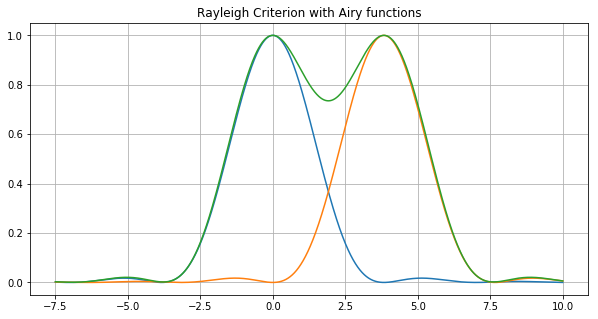

In [5]:
x=np.linspace(-7.5,10,10000)
a1 = (2*j1(x)/x)**2

def airy_disk(x):
    return (2*j1(x)/x)**2

distance = minimize(airy_disk,3.8).x
a2 = (2*j1(x-distance)/(x-distance))**2
airy = a1 + a2
plt.figure(figsize=[10,5])
plt.plot(x,a1)
plt.plot(x,a2)
plt.plot(x,airy)
plt.title('Rayleigh Criterion with Airy functions')
plt.grid(1)
plt.show()

In [13]:
print (np.max(airy))
print (signal.argrelmin(airy)) # find the index of all minimums
print (np.max([airy[1546],airy[3109],airy[5957],airy[8806]])) # find the min between 2 peaks
contrast = (np.max(airy) - airy[5957]) / (np.max(airy) + airy[5957])
print ('contrast =', contrast)

0.9999999804634033
(array([1546, 3109, 5957, 8806]),)
0.7350368304379642
contrast = 0.1527132729177016


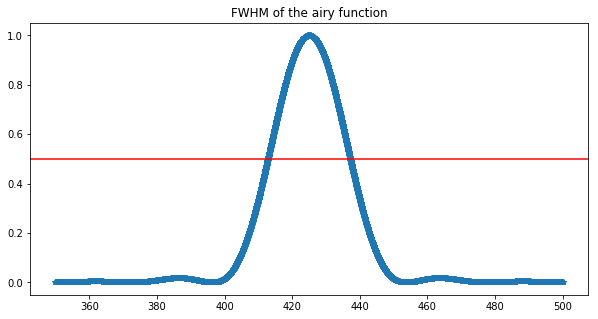

In [45]:
w = np.linspace(350,500,10000)
plt.figure(figsize=[10,5])
plt.title('FWHM of the airy function')
plt.plot(wavelength,a1,'*')
plt.axhline(y=np.max(a1)/2., color='r', linestyle='-')

In [47]:
FWHM = w[np.where(a1>=np.max(a1)/2.)[0][-1]] - w[np.where(a1>=np.max(a1)/2.)[0][0]]
print ('FWHM =', FWHM)

FWHM = 24.227422742274257


In [46]:
FWHM/np.sqrt(8*np.log(2))

10.288439149903633

In [36]:
7.092933416366577/0.0030274391174316406

2342.88226492361

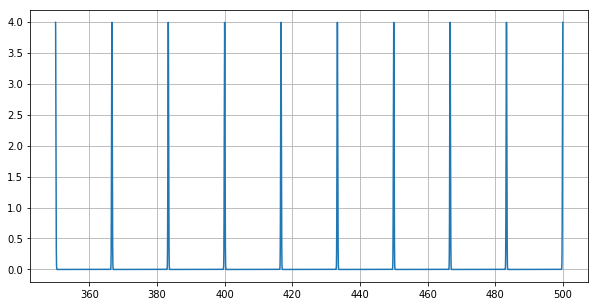

In [49]:
def fct_Gauss(x,esp,var):
    return ((1./np.sqrt(var*2*np.pi))*np.exp(-0.5*(x-esp)**2/var))
# Create a very narrow Gaussian incoming signal
variance = 0.01 # start with a fixed variance
n = 100000 # many steps to make the gaussian extremly narrow
n_pic = 10 # number of peaks in the signal
wavelength = np.linspace(350,500,n)
distance = np.linspace(350,500,n_pic)
fi = np.zeros(n)
for i in distance:
    fi += fct_Gauss(wavelength,i,variance) 
plt.figure(figsize=[10,5])
plt.plot(wavelength,fi)
plt.grid(True)

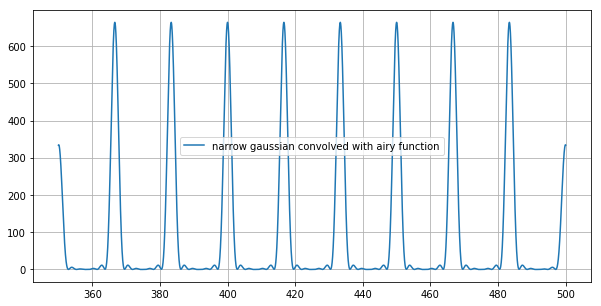

In [54]:
y_conv = np.convolve(fi, a1, mode='same')
plt.figure(figsize=[10,5])
plt.plot(wavelength,y_conv,label='narrow gaussian convolved with airy function')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
### TEST OF 2 GAUSSIANS ###
# Gaussian
def fct_Gauss(x,esp,var):
    return ((1./np.sqrt(var*2*np.pi))*np.exp(-0.5*(x-esp)**2/var))
















